# Step 1: Load the required libraries

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=aad0e503999f0324f0fe9efafd037db83a5900e57f7402d13727f7a3594ba4ca
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np



# Step 2: Load the data

In [3]:
spark = SparkSession.builder.appName("AirQuality").getOrCreate()

city_day = spark.read.csv("city_day.csv", header=True, inferSchema=True)
city_hour = spark.read.csv("city_hour.csv", header=True, inferSchema=True)
station_day = spark.read.csv("station_day.csv", header=True, inferSchema=True)
station_hour = spark.read.csv("station_hour.csv", header=True, inferSchema=True)
stations = spark.read.csv("stations.csv", header=True, inferSchema=True)


# Step 3: Data Cleaning

In [4]:
# Remove any missing or duplicate values
city_day = city_day.dropna().dropDuplicates()
city_hour = city_hour.dropna().dropDuplicates()
station_day = station_day.dropna().dropDuplicates()
station_hour = station_hour.dropna().dropDuplicates()
stations = stations.dropna().dropDuplicates()


# Step 4: Data Exploration

In [5]:
# Check the schema of the datasets
city_day.printSchema()
city_hour.printSchema()
station_day.printSchema()
station_hour.printSchema()
stations.printSchema()

# Show the first few rows of the datasets
city_day.show(5)
city_hour.show(5)
station_day.show(5)
station_hour.show(5)
stations.show(5)

# Get the summary statistics of the datasets
city_day.describe().show()
city_hour.describe().show()
station_day.describe().show()
station_hour.describe().show()


root
 |-- City: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- PM25: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- NOx: double (nullable = true)
 |-- NH3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- Benzene: double (nullable = true)
 |-- Toluene: double (nullable = true)
 |-- Xylene: double (nullable = true)
 |-- AQI: integer (nullable = true)
 |-- AQI_Bucket: string (nullable = true)

root
 |-- City: string (nullable = true)
 |-- Datetime: string (nullable = true)
 |-- PM25: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- NOx: double (nullable = true)
 |-- NH3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- Benzene: doubl

# Step 5: Data Aggregation

In [6]:
# Compute average values by city and date
from pyspark.sql.functions import avg, sum

city_day_agg = city_day.groupBy("City", "Date") \
    .agg(avg("PM10").alias("avg_PM10"), 
         avg("NO2").alias("avg_NO2"), 
         avg("SO2").alias("avg_SO2"), 
         avg("CO").alias("avg_CO"), 
         avg("O3").alias("avg_O3"))
         
city_day_agg.show()


+-------------+----------+--------+-------+-------+------+------+
|         City|      Date|avg_PM10|avg_NO2|avg_SO2|avg_CO|avg_O3|
+-------------+----------+--------+-------+-------+------+------+
|        Delhi|03-10-2017|  127.48|  26.09|   5.81|   0.2| 34.34|
|      Kolkata|01-06-2019|   69.53|  17.79|   2.88|   0.4| 26.32|
|    Hyderabad|07-10-2019|   81.52|  23.98|   5.21|  0.57| 24.25|
|        Patna|29-06-2020|   42.83|  20.51|    3.6|  0.88|  17.5|
|      Kolkata|29-07-2019|   20.56|  17.97|   2.34|  0.44| 21.18|
|     Amritsar|25-07-2019|    53.0|   9.31|  12.54|  0.27| 21.49|
|        Patna|10-02-2020|  177.26|  53.96|   9.59|  1.36|  14.1|
|    Amaravati|14-01-2018|  129.99|  28.32|   4.83|  0.05|  62.6|
|     Amritsar|16-09-2019|   61.35|  17.21|  12.85|  0.47|  24.2|
|    Hyderabad|13-10-2018|  130.27|  46.54|   10.8|  0.64| 21.39|
|Visakhapatnam|11-07-2018|   84.57|  43.01|   27.6|   0.4|  9.27|
|        Delhi|02-02-2019|   266.3|  35.89|  11.55|  1.24| 30.88|
|   Chandi

# Step 6: Data Visualization

In [7]:
# Calculate daily and monthly averages for NO2 parameter
no2_daily = city_day.groupBy(['City', 'Date']).agg(avg('NO2').alias('avg_NO2'))
no2_monthly = no2_daily.agg(avg('avg_NO2').alias('avg_monthly_NO2'))

# Show the results
no2_daily.show()
no2_monthly.show()





+-------------+----------+-------+
|         City|      Date|avg_NO2|
+-------------+----------+-------+
|        Delhi|03-10-2017|  26.09|
|      Kolkata|01-06-2019|  17.79|
|    Hyderabad|07-10-2019|  23.98|
|        Patna|29-06-2020|  20.51|
|      Kolkata|29-07-2019|  17.97|
|     Amritsar|25-07-2019|   9.31|
|        Patna|10-02-2020|  53.96|
|    Amaravati|14-01-2018|  28.32|
|     Amritsar|16-09-2019|  17.21|
|    Hyderabad|13-10-2018|  46.54|
|Visakhapatnam|11-07-2018|  43.01|
|        Delhi|02-02-2019|  35.89|
|   Chandigarh|14-03-2020|  12.29|
|    Hyderabad|30-08-2018|  26.52|
|        Delhi|27-10-2015|  49.25|
|        Delhi|13-01-2019|  66.11|
|    Hyderabad|20-06-2018|  21.39|
|    Hyderabad|22-01-2019|  33.37|
|Visakhapatnam|04-05-2020|  15.64|
|    Amaravati|07-04-2018|  10.84|
+-------------+----------+-------+
only showing top 20 rows

+------------------+
|   avg_monthly_NO2|
+------------------+
|31.708189544579906|
+------------------+



In [8]:
import plotly.express as px

# Convert PySpark dataframe to Pandas dataframe
no2_daily_pd = no2_daily.toPandas()

# Create a bar graph color
fig = px.bar(no2_daily_pd, x='City', y='avg_NO2', color='City', title='Daily Average NO2')
fig.show()


In [9]:
import plotly.express as px

# Convert PySpark dataframe to Pandas dataframe
no2_daily_pd = no2_daily.toPandas()

# Create a scatter plot
fig = px.scatter(no2_daily_pd, x='avg_NO2', y='City', color='City', title='avg_NO2 vs city')
fig.show()


# **Model Building**

# **Step 7: Using Linear Regression**

In [38]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Prepare the data for modeling
lr_df = station_day.filter(station_day.StationId == "DL001").select("Date","PM10", "NO2", "SO2", "CO", "O3")
vectorAssembler = VectorAssembler(inputCols=["NO2", "SO2", "CO", "O3"], outputCol="features")
lr_df = vectorAssembler.transform(lr_df)
lr_df = lr_df.select("Date", "PM10", "features")
lr_df = lr_df.withColumnRenamed("PM10", "label")

# Split the data into training and testing datasets
train_data, test_data = lr_df.randomSplit([0.7, 0.3])

# Train the model
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_data)

# Make predictions
lr_predictions = lr_model.transform(test_data)

# Evaluate the model
lr_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
rmse = lr_evaluator.evaluate(lr_predictions)

# Calculate normalized RMSE
mean_pm10 = lr_df.select(avg('label')).collect()[0][0]
lnrmse = rmse / mean_pm10
print("Normalized RMSE:", lnrmse)


Normalized RMSE: 0.5014146360279921


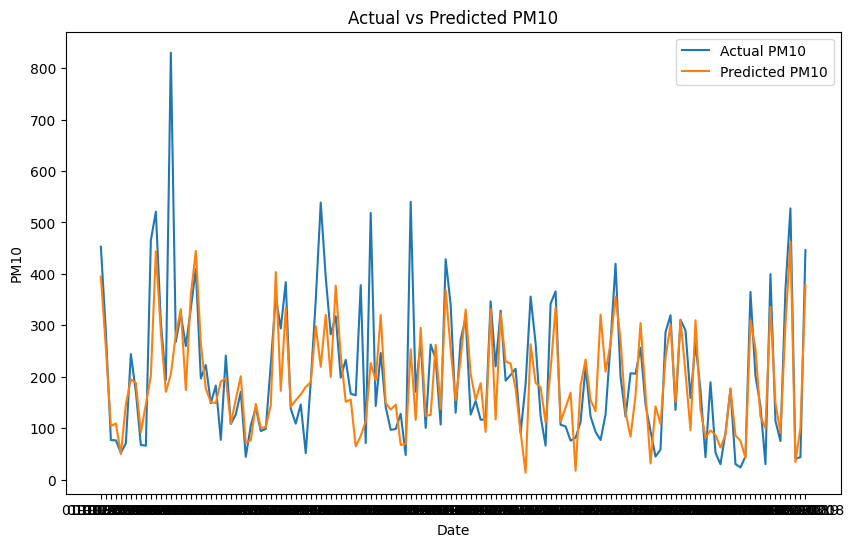

In [39]:
import matplotlib.pyplot as plt

# Extract the actual and predicted PM10 values from the DataFrame
actual_pm10 = lr_predictions.select("label").rdd.flatMap(lambda x: x).collect()
predicted_pm10 = lr_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

# Create a list of dates for x-axis
dates = lr_predictions.select("Date").rdd.flatMap(lambda x: x).collect()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(dates, actual_pm10, label="Actual PM10")
plt.plot(dates, predicted_pm10, label="Predicted PM10")
plt.xlabel("Date")
plt.ylabel("PM10")
plt.title("Actual vs Predicted PM10")
plt.legend()
plt.show()


# Step 8: Using Random Forest

In [40]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Prepare the data for modeling
rf_df = station_day.filter(station_day.StationId == "DL001").select("Date","PM10", "NO2", "SO2", "CO", "O3")
vectorAssembler = VectorAssembler(inputCols=["NO2", "SO2", "CO", "O3"], outputCol="features")
rf_df = vectorAssembler.transform(rf_df)
rf_df = rf_df.select("Date", "PM10", "features")
rf_df = rf_df.withColumnRenamed("PM10", "label")

# Split the data into training and testing datasets
train_data, test_data = rf_df.randomSplit([0.7, 0.3])

# Train the model
rf = RandomForestRegressor(numTrees=10, maxDepth=5, seed=42)
rf_model = rf.fit(train_data)

# Make predictions
rf_predictions = rf_model.transform(test_data)

# Evaluate the model
rf_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
rmse = rf_evaluator.evaluate(rf_predictions)

# Calculate normalized RMSE
mean_pm10 = rf_df.select(avg('label')).collect()[0][0]
rnrmse = rmse / mean_pm10
print("Normalized RMSE:", rnrmse)


Normalized RMSE: 0.34688559531435503


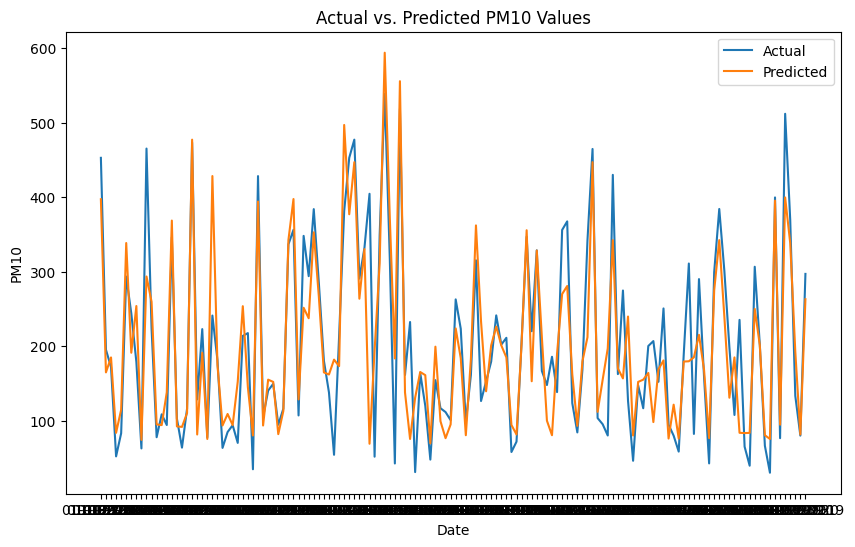

In [41]:
import matplotlib.pyplot as plt

# Extract the Date, PM10, and prediction columns from the predictions dataframe
date_col = rf_predictions.select("Date").rdd.flatMap(lambda x: x).collect()
pm10_col = rf_predictions.select("label").rdd.flatMap(lambda x: x).collect()
pred_col = rf_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

# Plot the actual and predicted PM10 values
plt.figure(figsize=(10, 6))
plt.plot(date_col, pm10_col, label="Actual")
plt.plot(date_col, pred_col, label="Predicted")
plt.xlabel("Date")
plt.ylabel("PM10")
plt.title("Actual vs. Predicted PM10 Values")
plt.legend()
plt.show()


# **Using Gradient-Boosted Trees Regression**

In [42]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Prepare the data for modeling
gbt_df = station_day.filter(station_day.StationId == "DL001").select("Date","PM10", "NO2", "SO2", "CO", "O3")
gbt_df = vectorAssembler.transform(gbt_df)
gbt_df = gbt_df.select("Date", "PM10", "features")
gbt_df = gbt_df.withColumnRenamed("PM10", "label")

# Split the data into training and testing datasets
train_data, test_data = gbt_df.randomSplit([0.7, 0.3])

# Train the model
gbt = GBTRegressor(maxIter=10, maxDepth=5, seed=42)
gbt_model = gbt.fit(train_data)

# Make predictions
gbt_predictions = gbt_model.transform(test_data)

# Evaluate the model with normalized RMSE
gbt_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)

# Calculate the normalized RMSE
mean_pm10 = gbt_df.select("label").groupBy().avg("label").first()[0]
gnrmse = rmse / mean_pm10

print("RMSE:", rmse)
print("Normalized RMSE:", gnrmse)


RMSE: 84.15305333946054
Normalized RMSE: 0.4388560905894479


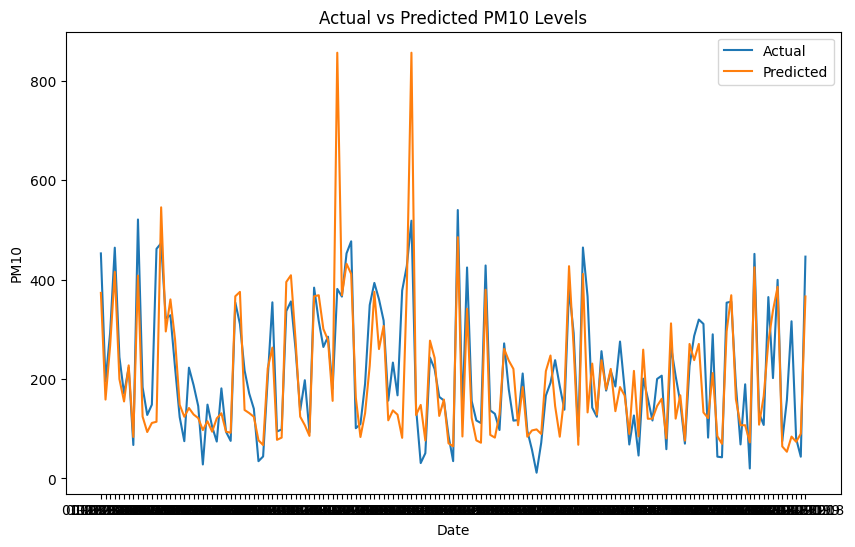

In [43]:
import matplotlib.pyplot as plt

# Extract the actual and predicted values
actuals = gbt_predictions.select("label").rdd.flatMap(lambda x: x).collect()
predictions = gbt_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

# Create a list of dates for the x-axis
dates = [str(row.Date) for row in test_data.select("Date").collect()]

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(dates, actuals, label="Actual")
plt.plot(dates, predictions, label="Predicted")
plt.xlabel("Date")
plt.ylabel("PM10")
plt.title("Actual vs Predicted PM10 Levels")
plt.legend()
plt.show()


# **Using Decision Tree Regression**

In [44]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Prepare the data for modeling
dt_df = station_day.filter(station_day.StationId == "DL001").select("Date","PM10", "NO2", "SO2", "CO", "O3")

# Vector Assembler to combine input features into a single vector column
vectorAssembler = VectorAssembler(inputCols=["PM10", "NO2", "SO2", "CO", "O3"], outputCol="features")
dt_df = vectorAssembler.transform(dt_df)

# Standardize the input features using StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scalerModel = scaler.fit(dt_df)
dt_df = scalerModel.transform(dt_df)

dt_df = dt_df.select("Date", "PM10", "scaledFeatures")
dt_df = dt_df.withColumnRenamed("PM10", "label")

# Split the data into training and testing datasets
train_data, test_data = dt_df.randomSplit([0.7, 0.3], seed=42)

# Update the vector assembler to use the new column name
vectorAssembler = VectorAssembler(inputCols=["scaledFeatures"], outputCol="features")
train_data = vectorAssembler.transform(train_data)

# Train the model
dt = DecisionTreeRegressor(maxDepth=5, seed=42)
dt_model = dt.fit(train_data)

# Make predictions
test_data = vectorAssembler.transform(test_data)
dt_predictions = dt_model.transform(test_data)

# Evaluate the model using normalized RMSE
dt_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)

# Calculate the normalized RMSE
pm10_mean = dt_df.select("label").agg({"label":"mean"}).collect()[0][0]
pm10_std = dt_df.select("label").agg({"label":"stddev"}).collect()[0][0]
normalized_rmse = rmse/pm10_std

print("Normalized RMSE:", normalized_rmse)


Normalized RMSE: 0.10047281132898127


<Figure size 1000x600 with 0 Axes>

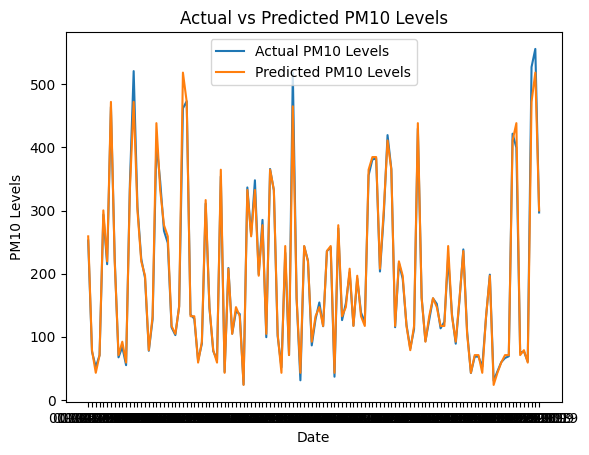

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the relevant data from the predictions dataframe
predictions_df = dt_predictions.select("Date", "label", "prediction").toPandas()

# Create a line chart of actual vs predicted PM10 levels
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.plot(predictions_df["Date"], predictions_df["label"], label="Actual PM10 Levels")
ax.plot(predictions_df["Date"], predictions_df["prediction"], label="Predicted PM10 Levels")
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("PM10 Levels")
ax.set_title("Actual vs Predicted PM10 Levels")
plt.show()


# Step 9: Model Evaluation

In [46]:
import plotly.graph_objects as go

# Normalized RMSE scores for each model
normalized_rmse_lr = lnrmse
normalized_rmse_rf = rnrmse
normalized_rmse_gbt = gnrmse
normalized_rmse_dt = normalized_rmse

# Create a cumulative graph
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree']
scores = [normalized_rmse_lr, normalized_rmse_gbt, normalized_rmse_rf, normalized_rmse_dt]

# Create a bar trace
trace = go.Bar(
    x=models,
    y=scores,
    text=scores,
    textposition='auto',
    marker=dict(color=scores, colorscale='Viridis', showscale=True),
    hovertemplate='<b>%{x}</b><br>Normalized RMSE: %{y}<extra></extra>'
)

# Create the layout
layout = go.Layout(
    title='Normalized RMSE Scores for Different Models',
    scene=dict(
        xaxis=dict(title='Models'),
        yaxis=dict(title='Normalized RMSE'),
        zaxis=dict(title='Scores')
    )
)

# Create the figure

fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()
